<a href="https://colab.research.google.com/github/sebastian122H/Rasselbande/blob/main/Python_for_Data_Science_Die_Rasselbande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy

# Data Cleaning and String Check

In [11]:
#This code reads the CSV file with the data points in it
df = pd.read_csv("tmdb_movies_data.csv")
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0.0,2.700677e+07
1,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,09.03.15,474,6.2,2015,0.0,2.056620e+07
2,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.0,4.222338e+04
3,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.0,0.000000e+00
4,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,06.12.15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/2006,834,5.3,2006,292050672.7,4.230205e+08
10862,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.4,2015,257599886.7,1.292632e+09
10863,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,2626,6.8,2007,315500574.8,1.010654e+09
10864,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,05.11.11,3180,6.3,2011,368371256.2,9.904175e+08


In [12]:
#This code shows the columns of the data frame of out data
df.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
#From this code we drop the unused columns that we do not require for our analysis
df.drop(['imdb_id', 'popularity', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies','release_date',
       'vote_count', 'vote_average'],axis = 1, inplace=True)

In [14]:
#To ensure we have the right data types for the analysis we check the types of data that are contained in the columns
df.dtypes

id                int64
budget            int64
revenue           int64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [15]:
#Just a quick check to see how everything is going
df

,id,budget,revenue,release_year,budget_adj,revenue_adj
0,280996,0,29355203,2015,0.0,2.700677e+07
1,339527,0,22354572,2015,0.0,2.056620e+07
2,284289,0,45895,2015,0.0,4.222338e+04
3,347096,0,0,2015,0.0,0.000000e+00
4,308369,0,0,2015,0.0,0.000000e+00
...,...,...,...,...,...,...
10861,1452,270000000,391081192,2006,292050672.7,4.230205e+08
10862,99861,280000000,1405035767,2015,257599886.7,1.292632e+09
10863,285,300000000,961000000,2007,315500574.8,1.010654e+09
10864,1865,380000000,1021683000,2011,368371256.2,9.904175e+08


In [29]:
#Now we drop and replace all values that represent 0, with a Nan value, which we then drop all at once. The reason for this is that it is impossible
#for a movie to have absolutely 0 units of budgets, as well as it being unrealistic to assume that any movie created and judged by IMDB has a revenue of 0.

df = df.replace([np.inf, -np.inf, 0], np.nan)


df = df.dropna(how="all", axis = 0)

df.dropna()


,id,budget,revenue,release_year,budget_adj,revenue_adj
5697,39964.0,1.0,1.000000e+02,1999.0,1.309053e+00,1.309053e+02
5699,59296.0,1.0,1.378000e+03,2011.0,9.693980e-01,1.335831e+03
5700,14373.0,2.0,1.600000e+01,1982.0,4.519285e+00,3.615428e+01
5701,39356.0,3.0,4.300000e+01,2010.0,3.000000e+00,4.300000e+01
5703,20701.0,3.0,1.600000e+01,1990.0,5.006696e+00,2.670238e+01
...,...,...,...,...,...,...
10861,1452.0,270000000.0,3.910812e+08,2006.0,2.920507e+08,4.230205e+08
10862,99861.0,280000000.0,1.405036e+09,2015.0,2.575999e+08,1.292632e+09
10863,285.0,300000000.0,9.610000e+08,2007.0,3.155006e+08,1.010654e+09
10864,1865.0,380000000.0,1.021683e+09,2011.0,3.683713e+08,9.904175e+08


In [17]:
#Here we creaeted a string check that looks through all the columns and from there on decides if the value it identifies is a string or not.
#If it is a string then that data point will be dropped from the data frame.
#Once all the strings are removed from the data frame then the code will return a "success" message.
def str_check(column): 
  for i in range(1, len(df.id)):
    if df.loc(i,) == str:

      df.replace(df.id(i), np.nan)
      df.dropna(how='all', axis=0)
      df

    else:

      return print("success")

def column_list():

  dict_column = {
      1:"id", 2:"budget", 3:"revenue", 4:"release_year", 5:"budget_adj", 6:"revenue_adj"
      }

  for i in range (1,6):
    str_check(dict_column[i])
    return 



column_list()

success


# Vizualisation

In [18]:
## comparing growth over the years
## simple line graph with years on the bottom
##scatter plot plotting the two columns against each other
## check 
##histogram
##distribution of errors equal?
##        - adjust the data points to create a more linear relatiosip ln() or squared to find a linear relationship
##use that linear regression to determine the pearsons correlation coeffieicent (R^2) to see how a variation in x affects y
## use machine learning to make future predctions
## add dummy variables to increase the reliatbility of the predcitions

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 

In [20]:
df.describe()

,id,budget,revenue,release_year,budget_adj,revenue_adj
count,10866.000000,5.170000e+03,4.850000e+03,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,3.073943e+07,8.922066e+07,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,3.890065e+07,1.620684e+08,12.812941,4.195701e+07,1.988419e+08
min,5.000000,1.000000e+00,2.000000e+00,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,6.000000e+06,7.708081e+06,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,1.700000e+07,3.182654e+07,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,4.000000e+07,9.991823e+07,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


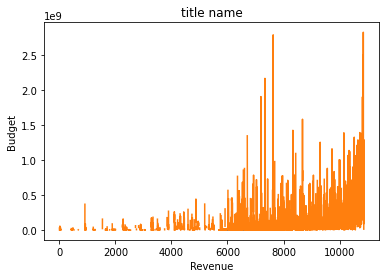

In [21]:
plt.plot(df[["budget_adj", "revenue_adj"]])
plt.title('title name')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

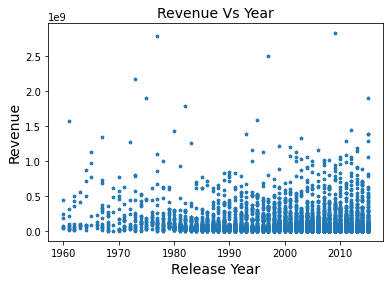

In [22]:
plt.scatter(df['release_year'], df['revenue_adj'], marker='p', s=10) 
plt.title('Revenue Vs Year', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
# Optional to do with release date as well, just a bit more messy
plt.show()

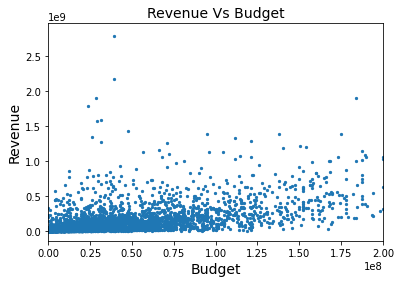

In [23]:
plt.scatter(df['budget_adj'], df['revenue_adj'], marker='o', s=5) 
plt.title('Revenue Vs Budget', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xlim(0, 2 * (10**8))






plt.show()

We can check for homegenity here, maybe linear relationbship analysis or something??

(array([1.916e+03, 1.038e+03, 6.900e+02, 4.100e+02, 2.890e+02, 2.320e+02,
        1.640e+02, 1.010e+02, 9.600e+01, 4.700e+01, 5.200e+01, 5.100e+01,
        2.200e+01, 1.700e+01, 1.500e+01, 6.000e+00, 1.100e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.21091051e-01, 1.41666676e+07, 2.83333342e+07, 4.25000008e+07,
        5.66666675e+07, 7.08333341e+07, 8.50000007e+07, 9.91666674e+07,
        1.13333334e+08, 1.27500001e+08, 1.41666667e+08, 1.55833334e+08,
        1.70000001e+08, 1.84166667e+08, 1.98333334e+08, 2.12500000e+08,
        2.26666667e+08, 2.40833334e+08, 2.55000000e+08, 2.69166667e+08,
        2.83333334e+08, 2.97500000e+08, 3.11666667e+08, 3.25833334e+08,
        3.40000000e+08, 3.54166667e+08, 3.68333333e+08, 3.82500000e+08,
        3.96666667e+08, 4.10833333e+08, 4.25000000e+08]),
 <a list of 30 Patch objects>)

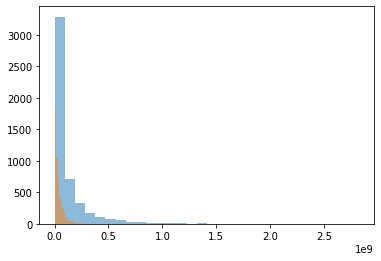

In [24]:

plt.hist(df["revenue_adj"], bins = 30, alpha = 0.5)
plt.hist(df["budget_adj"], bins = 30, alpha = 0.5)


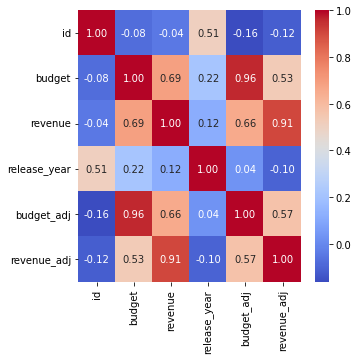

In [25]:
corr = df.corr()
corr
figure = plt.figure(figsize=(5,5)) 
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt="0.2f")

In [26]:
print(y)

NameError: ignored

In [27]:
#T-test: Budget_adj vs. revenue_adj


x = df["budget_adj"]
y = df["revenue_adj"]

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


MissingDataError: ignored

In [30]:
pearsonr(df['revenue_adj'], df['budget_adj'])

ValueError: ignored

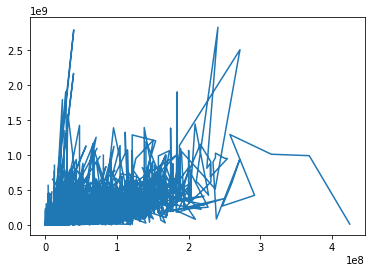

In [31]:
import numpy as np
import matplotlib.pyplot as plt


xs = df.budget_adj
ys = df.revenue_adj
plt.plot(xs, ys, label="function")
plt.show()

In [33]:
params = np.polyfit(xs, ys, deg=2)
line_fit = np.polyval(params,xs)
plt.plot(xs, line_fit, label="Fit function")
plt.plot(xs, ys, label="real function")
plt.legend()
plt.show()

ValueError: ignored

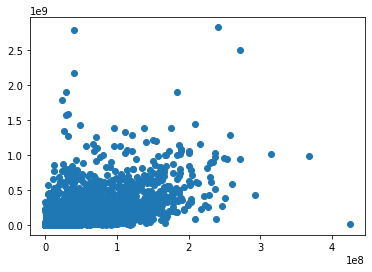

In [34]:
scatter = plt.scatter(df.budget_adj, df.revenue_adj)

In [35]:
def distance(a, b):
    """ Euclidean distance between vectors a and b """
    return np.linalg.norm(a - b)

def k_means(data, k, max_iter=10, plot_figs=True):
    """ Performs k-means clustering on data
    NOTE: This implementation has stability issues

    Arguments:
        data: n-dimensional data of shape (n_points, n_features)
        k: number of clusters to find
        max_iter: maximum number of iterations in case of non-convergence
        plot_figs: whether or not to plot figures at each iteration
    Returns:
        classes: dictionary of {centroid_position : list_of_cluster_members}
        mean_distance: mean centroid distance to points
    """
    # initialize centroids and create object to store data
    centroids = np.random.uniform(data.min(), data.max(), (k, data.shape[1]))
    classes = {tuple(c):[] for c in centroids}
    mean_distance = None

    # iterate until convergence
    for iter in range(max_iter):
        # clear out class members (needs to be recalculated)
        classes = {c:[] for c in classes.keys()}

        # Expectation step:
        # for each of the points in the dataset
        #   calculate the closest centroid C
        # append the point to the cluster whose centroid is C
        for point in scatter:
            closest_centroid = None
            closest_distance = None
            for centroid in classes.keys():
                if closest_distance is None or distance(centroid, point) < closest_distance:
                    closest_centroid = centroid
                    closest_distance = distance(centroid, point)
            
            classes[closest_centroid].append(point)

        # Store previous centroids to check convergence later
        prev_centroids = set(classes.keys())        

        # Maximization step:
        # update the centroids to be the mean of the points in its cluster
        for centroid, points in classes.items():
            if points:
                del classes[centroid]
                centroid = tuple(np.mean(points, axis=0))
                classes[centroid] = points

        # plot the predicted clusters for this iteration
        if plot_figs:
            for i, (centroid, points) in enumerate(classes.items()):
                points = np.array(points)
                if len(points) != 0:
                    plt.scatter(points[:,0], points[:,1], label="class "+str(i))
                plt.scatter(centroid[0], centroid[1], color="black", marker="x")
            plt.title("K-means iteration "+str(iter))
            plt.legend()
            plt.show()

        # calculate mean centroid distance
        distances = []
        for centroid, points in classes.items():
            for point in points:
                distances.append(distance(centroid, point))
        mean_distance = np.mean(distances)

        # Check convergence:
        # if the clusters are at the same position as before
        # the algorithm has converged
        if prev_centroids == set(classes.keys()):
            print(f"Converged! After {iter+1} iterations")
            return classes, mean_distance

    # if max_iterations have been done
    print(f"Could not converge after {max_iter} iterations!")
    return classes, mean_distance

classes, mean_distance = k_means(scatter, 3)

AttributeError: ignored